# NumPy/SciPy Tutorial

In this lab session, we'll go through [NumPy](https://numpy.org/). When you complete this notebook, you'll have a better understanding of most of the use cases that you'll need througout the course.

* this is a self-paced tutorial, but make sure you take some time on this week to get familiar with it. 
* If you find any part of this tutorial complicated, please prepare a list of questions for the beginning of the next lab. 
* I am aware that this may seem obvious and boring, but the answer to any question is probably contained in the [NumPy User Guide](https://numpy.org/doc/stable/user/index.html) and [Documentation](https://numpy.org/doc/stable/). 
* If you're serious about data science in Python, I strongly suggest going through the [NumPy Fundamentals](https://numpy.org/doc/stable/user/basics.html#numpy-fundamentals) at least once in your career. In fact, this very tutorial is mostly a condensed version of the Numpy fundamentals plus some SciPy, links to the relevant documentation pages are provided everywhere in the tutorial if you feel like having a deep dive into NumPy.

## Table of contents:

1. [The ndarray object](#The-ndarray-object)
2. [Array indexing](#Array-indexing)
3. [Random number generators](#Random-number-generators)


Before we start, let's import the libraries we'll need throughout the course, as well as some utility functions that will help us visualize what's going on.

In [3]:
import numpy as np
from tutorials.utils import *

## The ndarray object

In this section we will interact with (arguably) the most popular data structure in data science. The [Numpy ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html). 

### Creating a new array

The most intuitive way to create a numpy array is from an existing Python list or tuple. We do this by calling [`np.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) and passing a list to the function. The parameter can be any "array-like" object in python. To understand what is and isn't "array-like", check the documentation.

In [2]:
a = np.array([1,2,3,4,5])
a

array([1, 2, 3, 4, 5])

Numpy also provides functions for intrinsic array creation. Here we look at some options that will be very useful throughout the course, but there are many more. The first group is to create 

In [3]:
a = np.empty(5) # array of uninitialized data
print(f"np.empty: {a}")

a = np.zeros(5) # array initialized with zeros
print(f"np.zeros: {a}")

a = np.arange(5) # array initialized with zeros
print(f"np.arange: {a}")

a = np.eye(5, 8) # array with ones in the "main" diagonal
print(f"np.eye:\n{a}")

a = np.identity(5) # array with ones in the main diagonal
print(f"np.identity:\n{a}")

np.empty: [0. 0. 0. 0. 0.]
np.zeros: [0. 0. 0. 0. 0.]
np.arange: [0 1 2 3 4]
np.eye:
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]
np.identity:
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


We can also create an array from existing arrays:

Let's start with 2 arrays created from lists

In [4]:
a = np.arange(10)
b = np.arange(10, 20)

c = np.vstack([a, b])
print(f"np.vstack:\n{c}")

d = np.hstack([a, b])
print(f"np.hstack:\n{d}")

e = np.array(a, ndmin=3)
print(f"np.array with ndim=3:\n{e}")

np.vstack:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]]
np.hstack:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
np.array with ndim=3:
[[[0 1 2 3 4 5 6 7 8 9]]]


Finally, we can mutate existing arrays:

In [5]:
c_t = c.transpose()
print(f"c.transpose():\n{c_t}")

D = np.diag(a)
print(f"np.diag(a):\n{D}")

f = np.diag(D)
print(f"np.diag(D):\n{f}")



c.transpose():
[[ 0 10]
 [ 1 11]
 [ 2 12]
 [ 3 13]
 [ 4 14]
 [ 5 15]
 [ 6 16]
 [ 7 17]
 [ 8 18]
 [ 9 19]]
np.diag(a):
[[0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 6 0 0 0]
 [0 0 0 0 0 0 0 7 0 0]
 [0 0 0 0 0 0 0 0 8 0]
 [0 0 0 0 0 0 0 0 0 9]]
np.diag(D):
[0 1 2 3 4 5 6 7 8 9]


### Array attributes and methods


The ndarray data structure has some convenient attributes and methods we can use to interact with this array in a way that is way more convenient, safer, and faster than implementing our own structure. For example, we use the `shape` atrribute to get the cardinality of each dimension of the array, the `ndim` attribute to tell how many dimensions the array has, and the `T` attribute to get a transposed version of the array:

In [6]:
print(f"shape: {a.shape}")
print(f"ndim: {a.ndim}")
print(f"T:\n{c.T}")

shape: (10,)
ndim: 1
T:
[[ 0 10]
 [ 1 11]
 [ 2 12]
 [ 3 13]
 [ 4 14]
 [ 5 15]
 [ 6 16]
 [ 7 17]
 [ 8 18]
 [ 9 19]]


**IMPORTANT: unidimensional vectors in numpy**

Notice how the shape of the array is `(10,)`. This means that the array is 
not a column nor a row vector. This can have some complications when dealing with vector operations. For standard vector algebra, we need to explicitly create a 2D array.

numpy's `dot` and `matmul` (or `@` operator) will work with unidimensional arrays by appending or prepending a dimension to the arguments. Let's see some examples

In [7]:
# weirdness of unidimensional arrays:

print(f"np.array_equal(a, a.T): {np.array_equal(a, a.T)}")
print(f"np.matmul(a, a.T): {np.matmul(a, a.T)}")
print(f"np.matmul(a.T, a): {np.matmul(a.T, a)}")
print(f"np.matmul(a, a): {np.matmul(a, a)}")

# we transform the unidimensional array into a 2D array by adding a new,
# empty dimension
a_2d = a[:, np.newaxis]

print("\n2D array\n")

print(f"a_2d.shape: {a_2d.shape}")
print(f"np.array_equal(a_2d, a_2d.T): {np.array_equal(a_2d, a_2d.T)}")
print(f"np.matmul(a_2d, a_2d.T):\n{np.matmul(a_2d, a_2d.T)}")
print(f"np.matmul(a_2d.T, a_2d): {np.matmul(a_2d.T, a_2d)}")

# this one will generate an error, 
# but you're encouraged to uncomment and try
# print(f"np.matmul(a_2d, a_2d): {np.matmul(a_2d, a_2d)}")



np.array_equal(a, a.T): True
np.matmul(a, a.T): 285
np.matmul(a.T, a): 285
np.matmul(a, a): 285

2D array

a_2d.shape: (10, 1)
np.array_equal(a_2d, a_2d.T): False
np.matmul(a_2d, a_2d.T):
[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7  8  9]
 [ 0  2  4  6  8 10 12 14 16 18]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  4  8 12 16 20 24 28 32 36]
 [ 0  5 10 15 20 25 30 35 40 45]
 [ 0  6 12 18 24 30 36 42 48 54]
 [ 0  7 14 21 28 35 42 49 56 63]
 [ 0  8 16 24 32 40 48 56 64 72]
 [ 0  9 18 27 36 45 54 63 72 81]]
np.matmul(a_2d.T, a_2d): [[285]]


Other useful methods are aggregations and indices identifiers, here are a couple of useful examples:

In [8]:
# let's start with a new, unsorted array
a = np.array([2,6,3,8,9,1,5,7,3])
print(f"original array: {a}")

# get the maximum element
print(f"a.max(): {a.max()}")

# get the index of the maximum element
print(f"a.argmax(): {a.argmax()}")

# get the maximum element
print(f"a.min(): {a.min()}")

# get the index of the maximum element
print(f"a.argmin(): {a.argmin()}")

# get the mean of all values
print(f"a.mean(): {a.mean()}")

# get the sum of all values
print(f"a.sum(): {a.sum()}")

# get the indices that would sort the array
print(f"a.argsort(): {a.argsort()}")
print(f"a[a.argsort()]: {a[a.argsort()]}")

# get a 2D array with the data from the array
print(f"a.reshape(3,3):\n{a.reshape(3,3)}")


original array: [2 6 3 8 9 1 5 7 3]
a.max(): 9
a.argmax(): 4
a.min(): 1
a.argmin(): 5
a.mean(): 4.888888888888889
a.sum(): 44
a.argsort(): [5 0 2 8 6 1 7 3 4]
a[a.argsort()]: [1 2 3 3 5 6 7 8 9]
a.reshape(3,3):
[[2 6 3]
 [8 9 1]
 [5 7 3]]


## Array indexing

Array indexing in numpy is compatible with the standard Python `my_array[my_selection]` syntax, but allows for more complex indexing and slicing operations in higher dimensions.

### Basic indexing

If you've programmed using Python lists before, this way of indexing will feel very natural to you.

#### Single element indexing

To get a single element from a unidimensional ndarray, you use the exact same syntax as getting single elements from Python lists:

In [9]:
print(f"original array: {a}")

# get the first element
print(f"first element: {a[0]}")

# get the last element
print(f"last element: {a[-1]}")

# get the second to last element
print(f"second to last element: {a[-2]}")

original array: [2 6 3 8 9 1 5 7 3]
first element: 2
last element: 3
second to last element: 7


for 2D arrays, we can use the "list of lists" way of indexing, but the "numpy way" is to use a tuple, where each element of the tuple indexes a dimension: 

In [10]:
a_2d = a.reshape(3, 3)
print(f"2D array:\n{a_2d}")

# these two notations are equivalent, but the latter is preferred,
# especially for higher dimensional arrays
print(f"a_2d[1][1]: {a_2d[1][1]}, a_2d[1, 1]: {a_2d[1,1]}")

# of course, you can use negative indexing to start from the end of each
# dimension
print(f"a_2d[1, -1]: {a_2d[1,-1]}")

# Get the first row (as a unidimensional array)
print(f"first row (1D): {a_2d[0]}")

# Get the last column (as a unidimensional array)
# the : in the first dimension means "all elements" of that dimension
print(f"last column (1D): {a_2d[:,-1]}")

# Get the first row (as a unidimensional array)
print(f"first row (2D): {a_2d[[0]]}")

# Get the last column (as a unidimensional array)
# the : in the first dimension means "all elements" of that dimension
print(f"last column (2D):\n{a_2d[:,[-1]]}")

2D array:
[[2 6 3]
 [8 9 1]
 [5 7 3]]
a_2d[1][1]: 9, a_2d[1, 1]: 9
a_2d[1, -1]: 1
first row (1D): [2 6 3]
last column (1D): [3 1 3]
first row (2D): [[2 6 3]]
last column (2D):
[[3]
 [1]
 [3]]


#### Slicing and striding

Slicing in NumPy is also compatible and extends Python's basic concept of slicing to N dimensions. In this tutorial, we're going to work with unidimensional and 2-dimensional arrays, but I strongly encourage you to get familiar with array manipulation in higher dimensions, especially 3-dimensional arrays (often used for colored images), and 4-dimensional arrays (a "batch" of colored images). 

The basic slice is `start:stop:step`. This selects the elements in the array with indices corresponding to `start`, `start + step`, `start + 2 * step`, `...`, `start + m * steps`, where `m` is the maximum integer value of `m` so that `start + m * steps < stop`. By default, `start = 0`, `stop = None`, and `step = 1`.

Below we have some common useful examples:

In [11]:
# let's start with a sorted array, where every value matches its index
a = np.arange(10)

# select every element with an even index
print(f"every element with an even index: {a[::2]}")

# select every element with an odd index
print(f"every element with an odd index: {a[1::2]}")

# reverse the array 
print(f"reversed array: {a[::-1]}")

# let's create a bigger 2d array
b = np.arange(25).reshape(5, 5)

print(f"original 2D array:\n{b}")

# get every even row, and all columns
print(f"even rows:\n{b[::2,:]}")

# get all rows, and every odd column
print(f"odd columns:\n{b[:,1::2]}")

# get center square
print(f"center square:\n{b[1:4,1:4]}")

every element with an even index: [0 2 4 6 8]
every element with an odd index: [1 3 5 7 9]
reversed array: [9 8 7 6 5 4 3 2 1 0]
original 2D array:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
even rows:
[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]]
odd columns:
[[ 1  3]
 [ 6  8]
 [11 13]
 [16 18]
 [21 23]]
center square:
[[ 6  7  8]
 [11 12 13]
 [16 17 18]]


### Advanced indexing

On top of the Python slicing, we can use more complex selection objects for indexing. Getting used to all the variants of advanced indexing takes a lot of practice, and it's always useful to have the documentation open in a browser tab nearby.

Here I will simply write some examples that I think will be useful during the course.

In [12]:
# let's start with a fresh array
a = np.arange(10, 0, -1)
print(f"unidimensional array: {a}")

# we can use an ndarray of integers to make a complex selection of indices, and even repeat the indices:
print(f"integer ndarray: {a[np.array([3, 3, 1, 1, -8, 0])]}")

print(f"integer array: {a[[3, 3, 1, 1, -8, 0]]}")

unidimensional array: [10  9  8  7  6  5  4  3  2  1]
integer ndarray: [ 7  7  9  9  8 10]
integer array: [ 7  7  9  9  8 10]


#### Multidimensional indexing

In [13]:
# let's start with a fresh 2-dimensional array
a = np.arange(25).reshape(5,5)
print(f"2-dimensional array:\n{a}")

# let's get the elements at specific coordinates
# we simply pass an integer list of the components
# to each dimension, so, for elements with coordinates:
#     (0, 0)
#     (1, 4)
#     (1, 2)
#     (3, 0)
print(f"elements at specific coordinates: {a[[0, 1, 1, 3], [0, 4, 2, 0]]}")

# if all the elements share the same index along one dimension, we can mix
# advanced and simple indexing, so for element with coordinates:
#     (0, 1)
#     (1, 1)
#     (1, 1)
#     (3, 1)
print(f"elements at specific rows, same column: {a[[0, 1, 1, 3], 1]}")

# get the corner elements 
# this example uses broadcasting, which will be explained in a section below
# but notice how the we use a 2D column vector to indicate the rows, and 
# a unidimensional vector to indicate the columns
rows = np.array([0, -1]) # first and last
columns = np.array([0, -1]) # first and last
print(f"corner elements:\n{a[rows[:, np.newaxis], columns]}")

2-dimensional array:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
elements at specific coordinates: [ 0  9  7 15]
elements at specific rows, same column: [ 1  6  6 16]
corner elements:
[[ 0  4]
 [20 24]]


#### Boolean indexing

One of the most useful ways to index a multidimensional array is the boolean index. It allows us to select elements that hold true when subject to a condition. 

In [14]:
# let's keep the same array from the previous example:
print(f"2-dimensional array:\n{a}")

# let's get all elements that are below 7
idx = a < 7
print(f"indices below 7:\n{idx}")

print(f"elements below 7:\n{a[idx]}")

2-dimensional array:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
indices below 7:
[[ True  True  True  True  True]
 [ True  True False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]]
elements below 7:
[0 1 2 3 4 5 6]


To demonstrate how useful boolean indexes are, let's look at a practical example:

We have the image of a dog with a white background. 

Let's pretend that we need to save some space in our hard-drive, and 
we want to keep only the relevant part of this image.

In [15]:
# Let's load the image of a dog in grayscale
dog = get_dog_image()

# the representation of this image is, in fact, 
# a 2-dimensional ndarray of integers
dog

array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       ...,
       [254, 254, 254, ...,  99, 120, 139],
       [254, 254, 254, ..., 101, 122, 141],
       [254, 254, 254, ..., 102, 126, 145]])

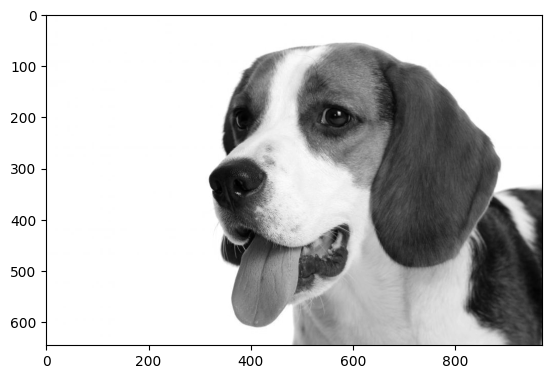

In [16]:
# Let's plot the image, just to see what we're dealing with
plot_image(dog)

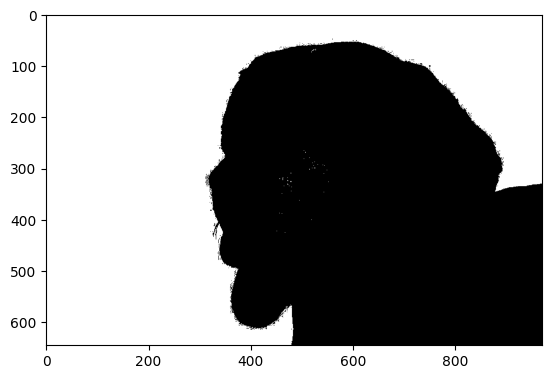

In [17]:
# If you look closely to the values in the array, we can see that 
# the higher the value, the whiter the pixel. 
# We can use this fact to figure out the silhouette of the dog:

white_pixels = dog > 250

# we can print the mask to see if we're right
plot_image(white_pixels)

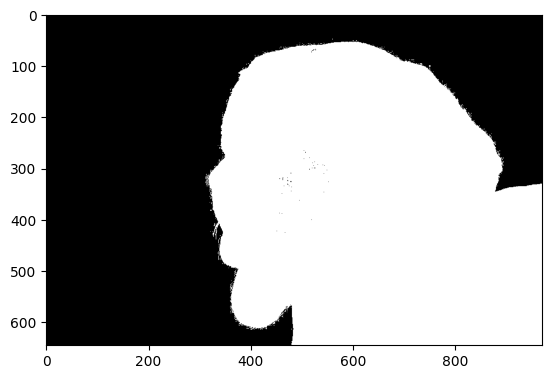

In [18]:
# Now that we have a clear idea of where the dog is, 
# we can select just the rectangle that contains a part of the silhouette

# we can achieve this using boolean conditions again.

# our mask now has True where the pixel represents the background, 
# and false if the image represents the dog. This is counterintuitive, 
# we can flip this aroun

silhoutette = ~white_pixels

plot_image(silhoutette)

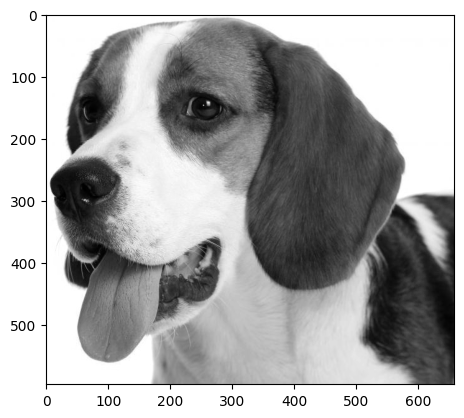

In [19]:
# now, we want to keep only the rows and columns where at least one pixel 
# contributes to the silhouette.

rows = silhoutette.any(axis=1)
cols = silhoutette.any(axis=0)

cropped_dog = dog[rows][:, cols]
plot_image(cropped_dog)

## Random number generators

In the [array creation](#Creating-a-new-array) section above, we saw an example of how to create an uninitialized array with `np.empty`. While this might seem enough to create a random array for rapid prototyping, this is note quite true.

In most cases when we deal with random number generators, some level of control is useful and often necessary to achieve repeatable results.

This matter is so important that a massive effort was put into creating [`numpy.random`](https://numpy.org/doc/stable/reference/random/index.html): the NumPy module of random number routines.

Below some useful examples using the new Random Generator API

In [20]:
# we import the default random number generator
from numpy.random import default_rng

by default, this uses a fresh unpredictable seed. Run this cell many times and you will generate a different set of mnatrices every time

In [21]:

rng = default_rng() 

a = rng.random((5,5))
b = rng.random((5,5))
c = rng.random((5,5))
print(f"a:\n{a}")
print(f"b:\n{b}")
print(f"c:\n{c}")

a:
[[0.44493975 0.79015645 0.58112326 0.53815488 0.18722111]
 [0.56580912 0.52329253 0.1401028  0.13388752 0.11067841]
 [0.13095901 0.97645554 0.29279158 0.26305224 0.09431269]
 [0.70672299 0.36875874 0.62867638 0.60693268 0.37551575]
 [0.88537181 0.05951437 0.39768007 0.25641842 0.06360209]]
b:
[[0.03161747 0.76605243 0.28169765 0.67723882 0.36081347]
 [0.76853611 0.53237476 0.38941924 0.76709286 0.14517456]
 [0.59721172 0.04642802 0.99597219 0.86490097 0.19760008]
 [0.54424411 0.47563759 0.40864728 0.32535119 0.57427894]
 [0.16381487 0.86664903 0.07607412 0.46504102 0.81983992]]
c:
[[0.20326078 0.92561913 0.04244133 0.53791843 0.9529806 ]
 [0.53830597 0.67942499 0.13466248 0.2356915  0.71012319]
 [0.1479964  0.02240489 0.51526295 0.73823122 0.27723923]
 [0.13709603 0.62725775 0.5400504  0.09567069 0.22798782]
 [0.8905718  0.21181405 0.24375428 0.44018183 0.48622911]]


If we sed a known seed, we can make sure we're using the same data.
This is extremely usfeul for prototyping!


In [22]:
rng = default_rng(0) 

a = rng.random((5,5))
b = rng.random((5,5))
c = rng.random((5,5))
print(f"a:\n{a}")
print(f"b:\n{b}")
print(f"c:\n{c}")

a:
[[0.63696169 0.26978671 0.04097352 0.01652764 0.81327024]
 [0.91275558 0.60663578 0.72949656 0.54362499 0.93507242]
 [0.81585355 0.0027385  0.85740428 0.03358558 0.72965545]
 [0.17565562 0.86317892 0.54146122 0.29971189 0.42268722]
 [0.02831967 0.12428328 0.67062441 0.64718951 0.61538511]]
b:
[[0.38367755 0.99720994 0.98083534 0.68554198 0.65045928]
 [0.68844673 0.38892142 0.13509651 0.72148834 0.52535432]
 [0.31024188 0.48583536 0.88948783 0.93404352 0.3577952 ]
 [0.57152983 0.32186939 0.59430003 0.33791123 0.391619  ]
 [0.89027435 0.22715759 0.62318714 0.08401534 0.83264415]]
c:
[[0.78709831 0.23936944 0.87648423 0.05856803 0.33611706]
 [0.15027947 0.45033937 0.79632427 0.23064221 0.0520213 ]
 [0.40455184 0.19851304 0.09075305 0.58033239 0.29869613]
 [0.67199488 0.19951544 0.94211311 0.36511017 0.10549528]
 [0.62910815 0.92715455 0.44037715 0.95459049 0.49989581]]


Among the most useful tools is to draw sample from a known distribution. Extremely useful to generate test data.

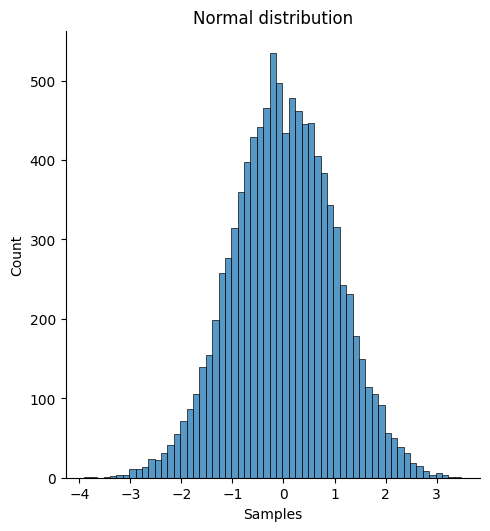

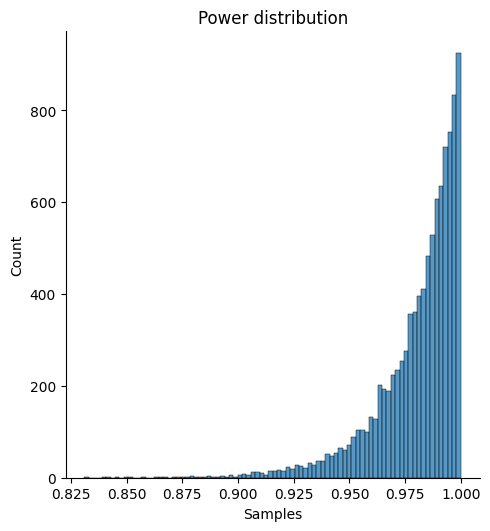

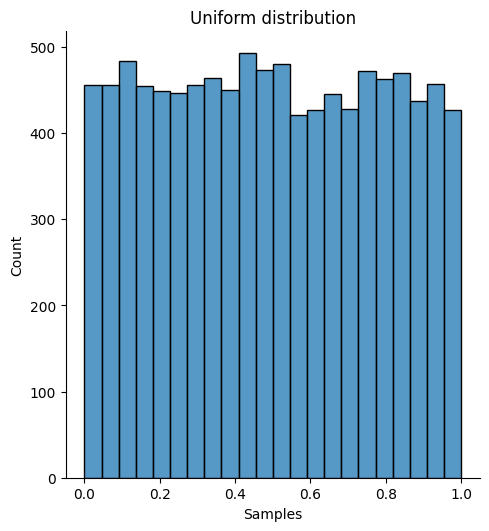

In [23]:
# Sample some data from the normal distribution
rng = default_rng(0)

a = rng.normal(size=10000)
plot_distribution(a, title="Normal distribution")

a = rng.power(50, size=10000)
plot_distribution(a, title="Power distribution")

a = rng.uniform(size=10000)
plot_distribution(a, title="Uniform distribution")

